### Notater til NAT624-timen om innlasting av nye data
Ta utgangspunkt i dette skriptet for å vise et eksempel på hvordan man kan laste ned et datasett som kan brukes i undesøkelsen av datasettet lærerne/elevene henter inn selv. Lag et nytt skript fra bunnen av "live". 

Dette er et notat-skript for den tredje NAT624-timen med programmering i python. Vi skal 

1) laste ned et datasett fra seklima.met.no

2) inspisere datasettet

3) lese datasettet inn i Python med pandas

4) konvertere til numpy

5) lage en figur

6) lese inn test-datasettet til Ragnhild

7) lage en figur med både data fra seklima.no og temperaturmålingene. 



#### 1) laste ned et datasett fra seklima.no

Vis valgmulighetene man har, men bruk dette:
- start: 4 Jan 22
- slutt: 6 Jan 22
- timesoppløsning
- lufttemperatur
- Bergen - Florida
- vis redulatat - sjekk at det er rett periode
- Last ned csv.

- kopier table.csv til MyProg-mappen (eller det de har kalt den)
- lag nytt og forståelig navn til filen. 

#### 2) inspiser datasettet

pandas er en ny pakke

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sti='W:/Work/Documents/EkteData/MyProg'
fil='/timesnedbør_Bergen_Januar.csv'


Åpne filen i notepad for å sjekke informasjonen og format, er det header, etc.


- `sep=';'` beskriver hva som deler kolonnene i filen. Hvis du åpner filen i f.eks. notepad ser du at dette er semikolon i vårt tilfelle, men det er ofte tab, komma (default), eller kolon. 
- Med `index_col` bestemmer du hvilken kolonne du vil sette til venstre og bruke som index. 
- `decimal=','` må være med fordi verdiene i denne csv-filen er lagret med komma som desimaltegn istedet for punktum. For at verdien skal tolkes som ett tall og ikke to må komma endres til punktum. 
- `parse_dates=['Tid(norsk normaltid)']` konverterer innholdet i denne kolonnen til dato-format.
- `dayfirst=True` sørger for at datoen tolkes riktig. Uten denne tolkes det første tallet i datoen som måned.
- `na_values='-'`: Hvis du åpner dette datasettet i notepas ser du at dette datasettet setter manglende verdier av moddeltemperatur til `-`. Dette greier ikke `decimal=','` å tolke som et tall, og derfor tolkes hele denne kolonnen som tekst (string). I stedet for at den første temperaturverdien blir `-4.3` som er et tall, blir denne verdien tolket som `'-4,3'` som er en tekst-string. Men, når man definerer `na_values='-'` forteller man koden at `'-'` betyr at en verdi mangler. Koden setter da alle instanser av `'-'` til `NaN` som står for Not a Number. 

#### 3) lese datasettet inn i Python med pandas


In [3]:
df = pd.read_csv(
    sti+fil, 
    sep=';', 
    decimal=',', 
    parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True
)

In [4]:
df

,Navn,Stasjon,Tid(norsk normaltid),Lufttemperatur
0,Bergen - Florida,SN50540,2022-01-04 01:00:00,2.5
1,Bergen - Florida,SN50540,2022-01-04 02:00:00,2.9
2,Bergen - Florida,SN50540,2022-01-04 03:00:00,3.6
3,Bergen - Florida,SN50540,2022-01-04 04:00:00,3.2
4,Bergen - Florida,SN50540,2022-01-04 05:00:00,3.3
...,...,...,...,...
68,Bergen - Florida,SN50540,2022-01-06 21:00:00,3.1
69,Bergen - Florida,SN50540,2022-01-06 22:00:00,3.5
70,Bergen - Florida,SN50540,2022-01-06 23:00:00,3.1
71,Bergen - Florida,SN50540,2022-01-07 00:00:00,2.4


In [5]:
df['Tid(norsk normaltid)']

0    2022-01-04 01:00:00
1    2022-01-04 02:00:00
2    2022-01-04 03:00:00
3    2022-01-04 04:00:00
4    2022-01-04 05:00:00
             ...        
68   2022-01-06 21:00:00
69   2022-01-06 22:00:00
70   2022-01-06 23:00:00
71   2022-01-07 00:00:00
72                   NaT
Name: Tid(norsk normaltid), Length: 73, dtype: datetime64[ns]

In [6]:
df['Lufttemperatur']

0     2.5
1     2.9
2     3.6
3     3.2
4     3.3
     ... 
68    3.1
69    3.5
70    3.1
71    2.4
72    NaN
Name: Lufttemperatur, Length: 73, dtype: float64

In [7]:
tid_Florida=df['Tid(norsk normaltid)'][:-1]
temp_Florida=df['Lufttemperatur'][:-1]

In [8]:
tid_Florida, temp_Florida

(0    2022-01-04 01:00:00
 1    2022-01-04 02:00:00
 2    2022-01-04 03:00:00
 3    2022-01-04 04:00:00
 4    2022-01-04 05:00:00
              ...        
 67   2022-01-06 20:00:00
 68   2022-01-06 21:00:00
 69   2022-01-06 22:00:00
 70   2022-01-06 23:00:00
 71   2022-01-07 00:00:00
 Name: Tid(norsk normaltid), Length: 72, dtype: datetime64[ns],
 0     2.5
 1     2.9
 2     3.6
 3     3.2
 4     3.3
      ... 
 67    3.0
 68    3.1
 69    3.5
 70    3.1
 71    2.4
 Name: Lufttemperatur, Length: 72, dtype: float64)

#### 4) Konverter til Numpy

In [9]:
tid_Florida=tid_Florida.to_numpy()

In [10]:
temp_Florida=temp_Florida.to_numpy()

In [11]:
temp_Florida

array([ 2.5,  2.9,  3.6,  3.2,  3.3,  3.8,  2.9,  3.4,  2.9,  1.5,  2.7,
        3.5,  4.7,  3.6,  3.8,  2.8,  3.7,  3.6,  2.7,  2.4,  2.4,  2.5,
        2.1,  2.2,  2.3,  2. ,  2.3,  1.8,  2.1,  2.3,  2.4,  2.2,  2.5,
        2.3,  2.6,  2.3,  3. ,  2.9,  2.6,  2.5,  2.4,  2.5,  0.9,  0.1,
        1.4,  1. ,  0.7,  0.3, -1.1, -1.3, -1.6, -1.9, -2.4, -2.3, -2.3,
       -2.5, -2.1, -2.2, -0.8,  0.7,  0.9,  1. ,  1.4,  1.5,  1.7,  2.4,
        2.6,  3. ,  3.1,  3.5,  3.1,  2.4])

In [12]:
tid_Florida.shape, temp_Florida.shape

((72,), (72,))

#### 5) lage en figur
og sammenlign med seklima.no-figuren

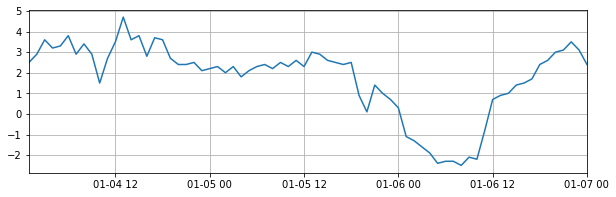

In [13]:
plt.figure(figsize=(10,3))
plt.plot(tid_Florida,temp_Florida)
plt.grid()
plt.xlim(tid_Florida[0], tid_Florida[-1])
plt.show()

#### 6) lese inn test-datasettet til Ragnhild

In [14]:
sti='W:/Work/Documents/EkteData/EkteData/data'
fil='/4-6_januar_Temperaturegistrering_AB-vei.csv'

In [15]:
df=pd.read_csv(
    sti+fil, sep=',', engine='python',
    parse_dates=['Time']
)

In [16]:
df

,Temp AB-vei,Time,Celsius(°C),Comments,Serial Number
0,1,2022-01-04 15:00:00,4.0,NaN,60039020.0
1,2,2022-01-04 15:01:00,4.0,NaN,NaN
2,3,2022-01-04 15:02:00,4.0,NaN,NaN
3,4,2022-01-04 15:03:00,4.0,NaN,NaN
4,5,2022-01-04 15:04:00,4.0,NaN,NaN
...,...,...,...,...,...
2569,2570,2022-01-06 09:49:00,9.5,NaN,NaN
2570,2571,2022-01-06 09:50:00,10.5,NaN,NaN
2571,2572,2022-01-06 09:51:00,11.0,NaN,NaN
2572,2573,2022-01-06 09:52:00,12.0,NaN,NaN


In [17]:
tid=df['Time']
temp=df['Celsius(°C)']

In [18]:
temp=temp.to_numpy()
tid=tid.to_numpy()

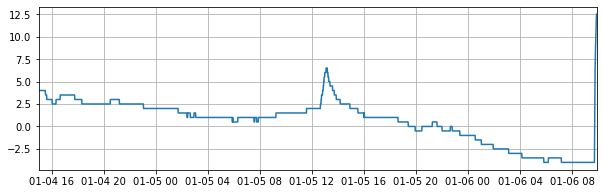

In [19]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

#### 7) lage en figur med både data fra seklima.no og temperaturmålingene.

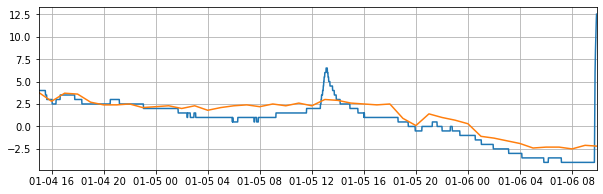

In [20]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.plot(tid_Florida,temp_Florida)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

Dette ser jo ikke så gale ut! Men hva skjedde ca kl13 5. januar og kl10 6. januar? Var været hos Ragnhild litt anneledes enn været på Florida? Kan det være en feilkilde? Skygge vs sol, ble instrumentet tatt inn før loggeren ble skrudd av? 

Det er viktig å ta litt notater iblant når man henter inn data (dersom det er mulig). Det kan gjøre det mye enklere å tolke dataene i etterkant!